In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
df = pd.read_csv('breast-cancer.csv')

df.drop(columns=['id', 'diagnosis'], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

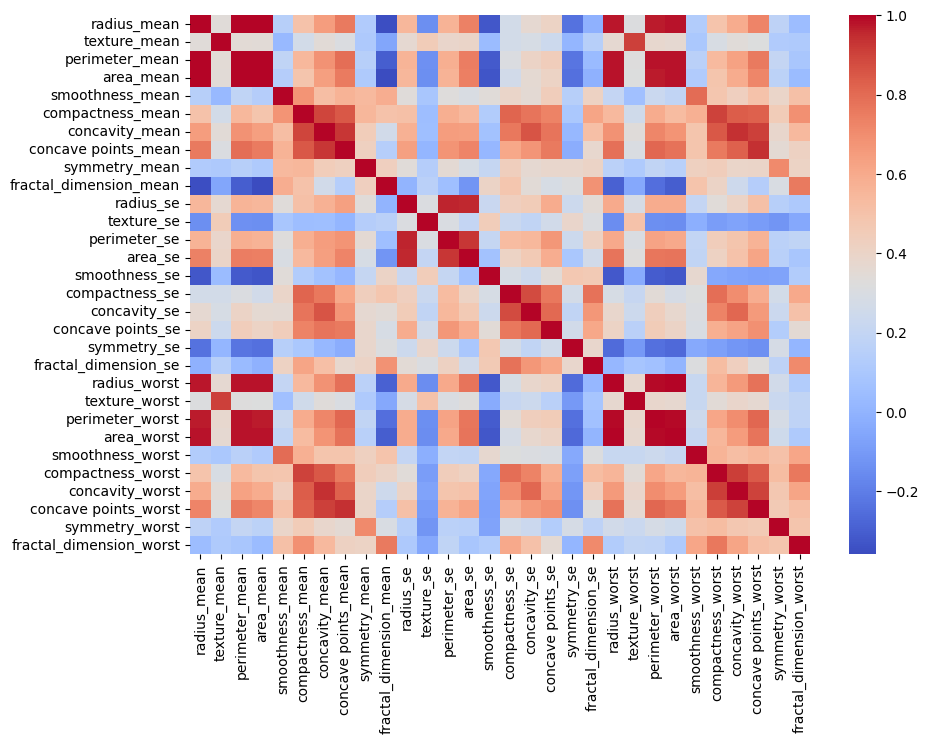

In [10]:
plt.figure(figsize=(10, 7))

m_corr = df.corr(method="spearman")

sns.heatmap(m_corr, cmap='coolwarm')


plt.show()

In [11]:
y = df["radius_mean"].to_numpy()

x = df[["area_worst", "perimeter_worst", "smoothness_se", "fractal_dimension_mean"]].to_numpy()

## Support Vector Regression (SVR)

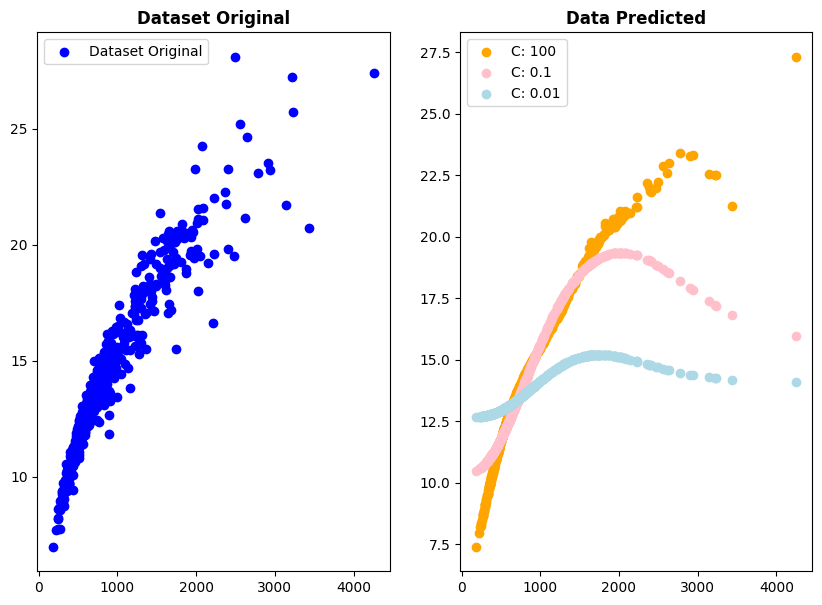

In [14]:
from sklearn.svm import SVR

srv1 = SVR(C=100).fit(x, y)
srv2 = SVR(C=0.1).fit(x, y)
srv3 = SVR(C=0.01).fit(x, y)

ypred1 = srv1.predict(x)
ypred2 = srv2.predict(x)
ypred3 = srv3.predict(x)

fig, axs = plt.subplots(1, 2, figsize=(10, 7), dpi=100)
axs[0].scatter(x[:, 0], y, c='blue', label='Dataset Original')
axs[0].set_title('Dataset Original', fontweight='bold')
axs[0].legend()

axs[1].scatter(x[:, 0], ypred1, c='orange', label='C: 100')
axs[1].scatter(x[:, 0], ypred2, c='pink', label='C: 0.1')
axs[1].scatter(x[:, 0], ypred3, c='lightblue', label='C: 0.01')
axs[1].set_title('Data Predicted', fontweight='bold')
axs[1].legend()

plt.show()